In [129]:
import pandas as pd
import numpy as np

The dataset is designed for predicting whether a student will pass or fail an exam based on the number of study hours and their scores in the previous exam.

Features:
Study Hours (numeric): Represents the number of hours a student spent studying for the upcoming exam.
Previous Exam Score (numeric): Indicates the student's score in the previous exam.
Pass/Fail (binary): The target variable, where 1 represents a pass and 0 represents a fail in the current exam.

**Description: **

Features:
Study Hours (numeric): Represents the number of hours a student spent studying for the upcoming exam.
Previous Exam Score (numeric): Indicates the student's score in the previous exam.
Pass/Fail (binary): The target variable, where 1 represents a pass and 0 represents a fail in the current exam.
Dataset Size:
The dataset consists of data for 500 students, ensuring a diverse range of study patterns and previous exam performances.

In [130]:
df = pd.read_csv('C:/Users/tabis/Desktop/Student Exam Performace analysis/data/student_exam_data.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [132]:
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Number inputs, SL no. (numerical)', ylabel='Value Range'>

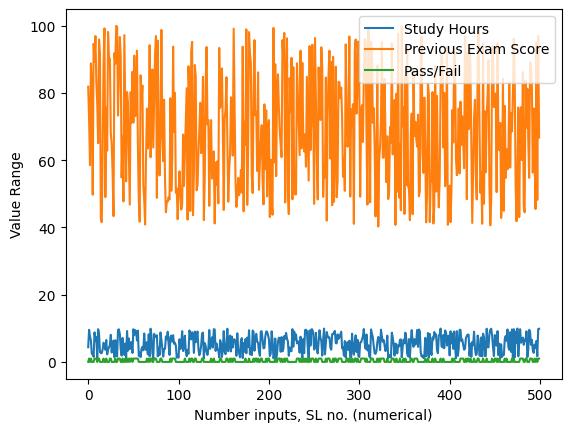

In [134]:
df.plot(kind = 'line', xlabel='Number inputs, SL no. (numerical)', ylabel= 'Value Range')

<Axes: xlabel='Study Hours', ylabel='Previous Exam Score'>

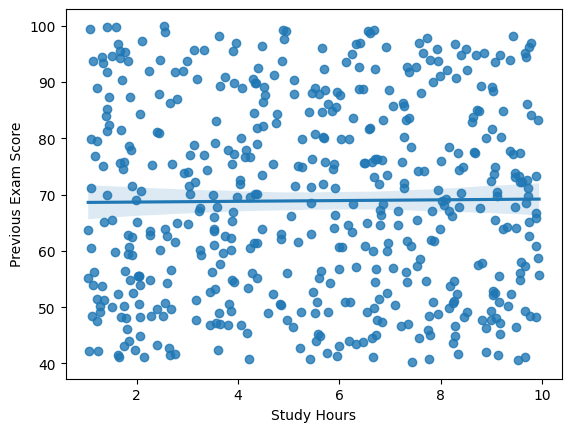

In [135]:
sns.regplot(data = df, x = 'Study Hours', y = 'Previous Exam Score', )

<Axes: xlabel='Study Hours', ylabel='Previous Exam Score'>

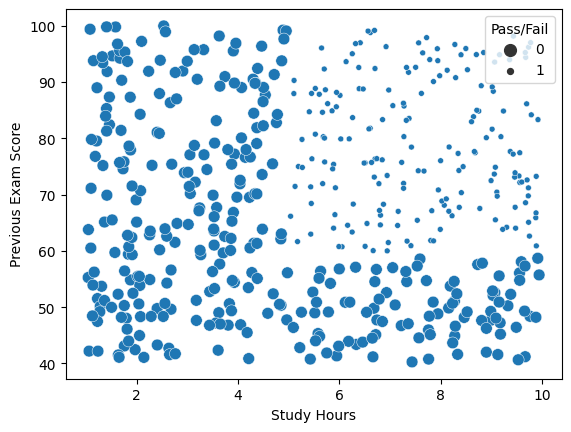

In [136]:
sns.scatterplot(data = df, y = 'Previous Exam Score', x = 'Study Hours', size = 'Pass/Fail')

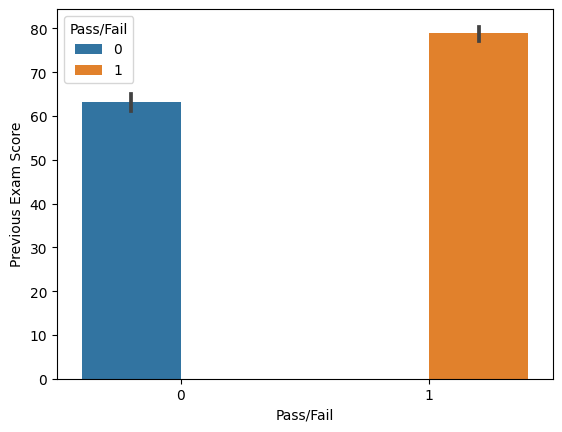

In [137]:
sns.barplot(data= df, x = 'Pass/Fail', y = 'Previous Exam Score', hue = 'Pass/Fail')
plt.show()

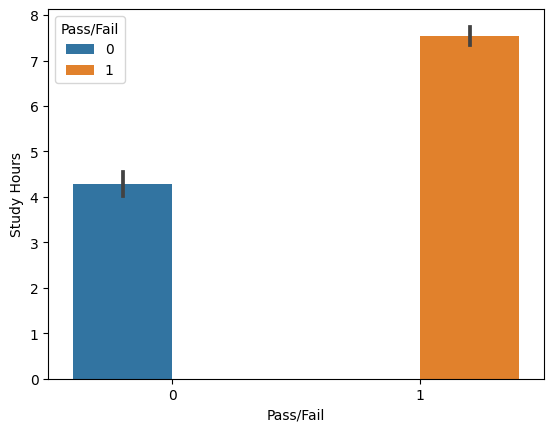

In [138]:
sns.barplot(data= df, x = 'Pass/Fail', y = 'Study Hours', hue='Pass/Fail')
plt.show()

# Study Hours
- Represents the number of hours a student spent studying for the upcoming exam

# Previous Exam Score
- Indicates the student's score in the previous exam

# Pass/Fail
- The target variable, where 1 represents a pass, and 0 represents a fail in the current exam.

In [139]:
df['Pass/Fail'].unique()

array([0, 1], dtype=int64)

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [141]:
X = df.drop('Pass/Fail', axis= 1)
y = df['Pass/Fail']

In [142]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.33)

In [144]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [145]:
model.score(X_test, y_test) * 100

87.27272727272727

In [146]:
ypred = model.predict(X_test)

In [147]:
y_test

132    0
176    0
369    0
278    1
158    0
      ..
364    1
436    0
441    1
226    0
152    0
Name: Pass/Fail, Length: 165, dtype: int64

C:\Users\tabis\AppData\Local\Temp\ipykernel_9764\1524049583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred, label = 'pred')
C:\Users\tabis\AppData\Local\Temp\ipykernel_9764\1524049583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='original')


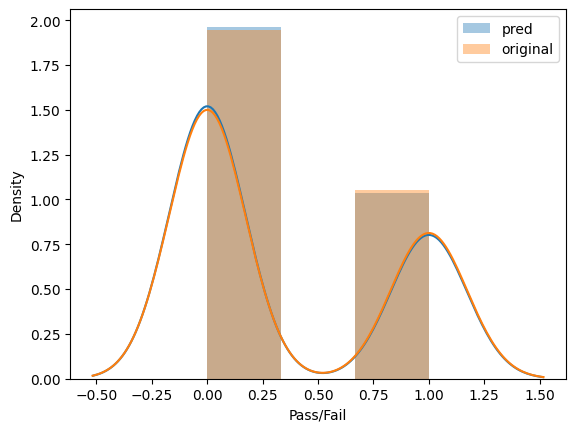

In [148]:
sns.distplot(ypred, label = 'pred')
sns.distplot(y_test, label='original')
plt.legend()
plt.show()

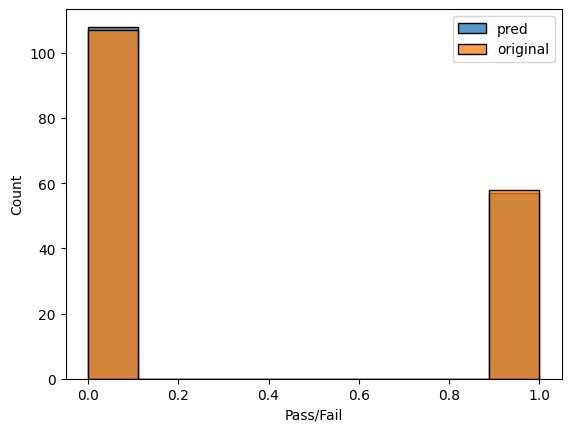

In [149]:
sns.histplot(ypred, label = 'pred')
sns.histplot(y_test, label='original')
plt.legend()
plt.show()

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [151]:
confusion_matrix(ypred, y_test)

array([[97, 11],
       [10, 47]], dtype=int64)

In [152]:
accuracy_score(y_true=y_test, y_pred=ypred)

0.8727272727272727

In [153]:
mean_squared_error(y_true=y_test, y_pred=ypred)

0.12727272727272726

In [154]:
import joblib

In [155]:
joblib.dump(model, 'logisticRegression.pkl')

['logisticRegression.pkl']

In [156]:
logReg = joblib.load('logisticRegression.pkl')

In [157]:
ypredcheck = logReg.predict(X_test)

C:\Users\tabis\AppData\Local\Temp\ipykernel_9764\3952873868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypredcheck, label = 'pred')
C:\Users\tabis\AppData\Local\Temp\ipykernel_9764\3952873868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='original')


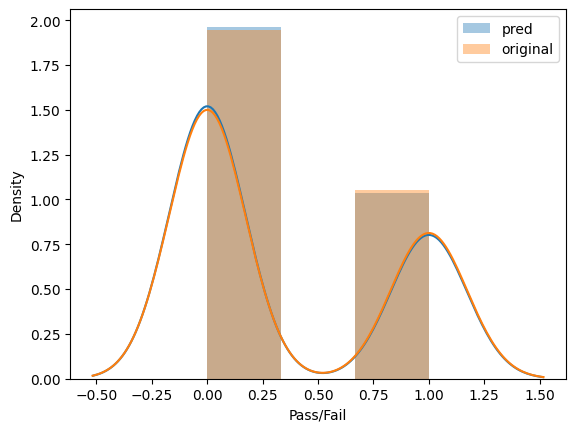

In [158]:
sns.distplot(ypredcheck, label = 'pred')
sns.distplot(y_test, label='original')
plt.legend()
plt.show()

In [161]:
joblib.dump(scaler, 'standardScaler.pkl')

['standardScaler.pkl']

In [159]:
ypredcheck = logReg.predict([[7.587945,58.571657]])

In [160]:
ypredcheck

array([1], dtype=int64)